In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Machine Learning in Python\Achievement 2\Project Data'

In [3]:
df_weather = pd.read_csv(os.path.join(path, 'DATASET_weather_clean_1-10.csv'))
df_answers = pd.read_csv(os.path.join(path, 'DATASET_predictions.csv'))
df_weather.columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_cloud_cover',
       ...
       'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity',
       'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=135)

In [4]:
df_answers = df_answers.drop(columns=['DATE'])
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Example: Aggregating features across all stations

columns_cloud_cover = [col for col in df_weather.columns if 'cloud_cover' in col]
df_weather['avg_cloud_cover'] = df_weather[columns_cloud_cover].mean(axis=1)
df_weather['max_cloud_cover'] = df_weather[columns_cloud_cover].max(axis=1)
df_weather['min_cloud_cover'] = df_weather[columns_cloud_cover].min(axis=1)

columns_humidity = [col for col in df_weather.columns if 'humidity' in col]
df_weather['avg_humidity'] = df_weather[columns_humidity].mean(axis=1)
df_weather['max_humidity'] = df_weather[columns_humidity].max(axis=1)
df_weather['min_humidity'] = df_weather[columns_humidity].min(axis=1)

columns_pressure = [col for col in df_weather.columns if 'pressure' in col]
df_weather['avg_pressure'] = df_weather[columns_pressure].mean(axis=1)
df_weather['max_pressure'] = df_weather[columns_pressure].max(axis=1)
df_weather['min_pressure'] = df_weather[columns_pressure].min(axis=1)

columns_global_radiation = [col for col in df_weather.columns if 'global_radiation' in col]
df_weather['avg_global_radiation'] = df_weather[columns_global_radiation].mean(axis=1)
df_weather['max_global_radiation'] = df_weather[columns_global_radiation].max(axis=1)
df_weather['min_global_radiation'] = df_weather[columns_global_radiation].min(axis=1)

columns_precipitation = [col for col in df_weather.columns if 'precipitation' in col]
df_weather['avg_precipitation'] = df_weather[columns_precipitation].mean(axis=1)
df_weather['max_precipitation'] = df_weather[columns_precipitation].max(axis=1)
df_weather['min_precipitation'] = df_weather[columns_precipitation].min(axis=1)

columns_sunshine = [col for col in df_weather.columns if 'sunshine' in col]
df_weather['avg_sunshine'] = df_weather[columns_sunshine].mean(axis=1)
df_weather['max_sunshine'] = df_weather[columns_sunshine].max(axis=1)
df_weather['min_sunshine'] = df_weather[columns_sunshine].min(axis=1)

columns_temp_mean = [col for col in df_weather.columns if 'temp_mean' in col]
df_weather['avg_temp_mean'] = df_weather[columns_temp_mean].mean(axis=1)
df_weather['max_temp_mean'] = df_weather[columns_temp_mean].max(axis=1)
df_weather['min_temp_mean'] = df_weather[columns_temp_mean].min(axis=1)

columns_temp_min = [col for col in df_weather.columns if 'temp_min' in col]
df_weather['avg_temp_min'] = df_weather[columns_temp_min].mean(axis=1)
df_weather['max_temp_min'] = df_weather[columns_temp_min].max(axis=1)
df_weather['min_temp_min'] = df_weather[columns_temp_min].min(axis=1)

columns_temp_max = [col for col in df_weather.columns if 'temp_max' in col]
df_weather['avg_temp_max'] = df_weather[columns_temp_max].mean(axis=1)
df_weather['max_temp_max'] = df_weather[columns_temp_max].max(axis=1)
df_weather['min_temp_max'] = df_weather[columns_temp_max].min(axis=1)

df_weather.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,min_sunshine,avg_temp_mean,max_temp_mean,min_temp_mean,avg_temp_min,max_temp_min,min_temp_min,avg_temp_max,max_temp_max,min_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,0.0,5.700000,10.6,-5.9,2.853333,9.4,-8.5,7.693333,11.5,-3.2
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,0.0,4.966667,9.8,-9.5,3.340000,7.5,-10.5,7.193333,12.2,-8.5
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,0.0,4.953333,10.5,-9.5,3.113333,8.1,-10.0,7.133333,12.9,-8.9
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,0.0,4.233333,10.3,-11.5,1.880000,7.3,-12.9,6.520000,16.1,-10.0
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,0.0,4.433333,12.1,-9.3,1.673333,8.9,-12.0,6.566667,16.0,-6.5


In [6]:
# Example for multiple features
aggregated_features = {
    'cloud_cover': [col for col in df_weather.columns if 'cloud_cover' in col],
    'humidity': [col for col in df_weather.columns if 'humidity' in col],
    'pressure': [col for col in df_weather.columns if 'pressure' in col],
    'global_radiation': [col for col in df_weather.columns if 'global_radiation' in col],
    'precipitation': [col for col in df_weather.columns if 'precipitation' in col],
    'sunshine': [col for col in df_weather.columns if 'sunshine' in col],
    'temp_mean': [col for col in df_weather.columns if 'temp_mean' in col],
    'temp_min': [col for col in df_weather.columns if 'temp_min' in col],
    'temp_max': [col for col in df_weather.columns if 'temp_max' in col],
}

# Create a new dataframe for aggregated features
aggregated_df = pd.DataFrame()
for feature_name, feature_columns in aggregated_features.items():
    aggregated_df[f'avg_{feature_name}'] = df_weather[feature_columns].mean(axis=1)
    aggregated_df[f'max_{feature_name}'] = df_weather[feature_columns].max(axis=1)
    aggregated_df[f'min_{feature_name}'] = df_weather[feature_columns].min(axis=1)

In [7]:
aggregated_df.head()

,avg_cloud_cover,max_cloud_cover,min_cloud_cover,avg_humidity,max_humidity,min_humidity,avg_pressure,max_pressure,min_pressure,avg_global_radiation,...,min_sunshine,avg_temp_mean,max_temp_mean,min_temp_mean,avg_temp_min,max_temp_min,min_temp_min,avg_temp_max,max_temp_max,min_temp_max
0,5.833333,8.0,1.0,0.847148,1.00,0.67,1.012927,1.0304,0.9978,0.312444,...,0.0,5.327778,10.6,-5.9,2.586296,9.4,-8.5,7.299630,11.5,-3.2
1,6.592593,8.0,4.0,0.832000,0.98,0.62,1.014088,1.0292,1.0007,0.255963,...,0.0,4.431481,9.8,-9.5,2.802222,7.5,-10.5,6.599630,12.2,-8.5
2,6.592593,8.0,4.0,0.863852,0.97,0.67,1.018436,1.0320,1.0096,0.243296,...,0.0,4.458519,10.5,-9.5,2.661852,8.1,-10.0,6.562963,12.9,-8.9
3,5.837037,8.0,0.0,0.886333,0.98,0.67,1.023598,1.0443,1.0114,0.298963,...,0.0,3.696296,10.3,-11.5,1.360000,7.3,-12.9,6.134444,16.1,-10.0
4,5.414815,8.0,2.0,0.857963,0.99,0.64,1.023179,1.0430,1.0092,0.361407,...,0.0,4.096296,12.1,-9.3,1.315185,8.9,-12.0,6.364815,16.0,-6.5


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train-test split
X = aggregated_df
y = df_answers  # Replace with the appropriate target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4714596949891068


[Text(0.33249858981520175, 0.9821428571428571, 'BUDAPEST_temp_max <= -1.15\ngini = 0.316\nsamples = 10139\nvalue = [[12057, 4008]\n[10485, 5580]\n[10839, 5226]\n[12873, 3192]\n[12613, 3452]\n[12557, 3508]\n[13348, 2717]\n[11582, 4483]\n[12712, 3353]\n[8949, 7116]\n[12691, 3374]\n[13621, 2444]\n[16065, 0]\n[13371, 2694]\n[15198, 867]]'),
 Text(0.13758616676524257, 0.9464285714285714, 'BUDAPEST_global_radiation <= 4.897\ngini = 0.124\nsamples = 5840\nvalue = [[8495, 795]\n[8208, 1082]\n[8388, 902]\n[8788, 502]\n[8695, 595]\n[8597, 693]\n[8909, 381]\n[8475, 815]\n[8758, 532]\n[7153, 2137]\n[8853, 437]\n[8912, 378]\n[9290, 0]\n[9000, 290]\n[9104, 186]]'),
 Text(0.06644019638556177, 0.9107142857142857, 'BUDAPEST_temp_mean <= 11.987\ngini = 0.051\nsamples = 4744\nvalue = [[7272, 255]\n[7023, 504]\n[7263, 264]\n[7437, 90]\n[7366, 161]\n[7371, 156]\n[7449, 78]\n[7284, 243]\n[7415, 112]\n[6512, 1015]\n[7403, 124]\n[7491, 36]\n[7527, 0]\n[7519, 8]\n[7494, 33]]'),
 Text(0.026776620747081543, 0.87

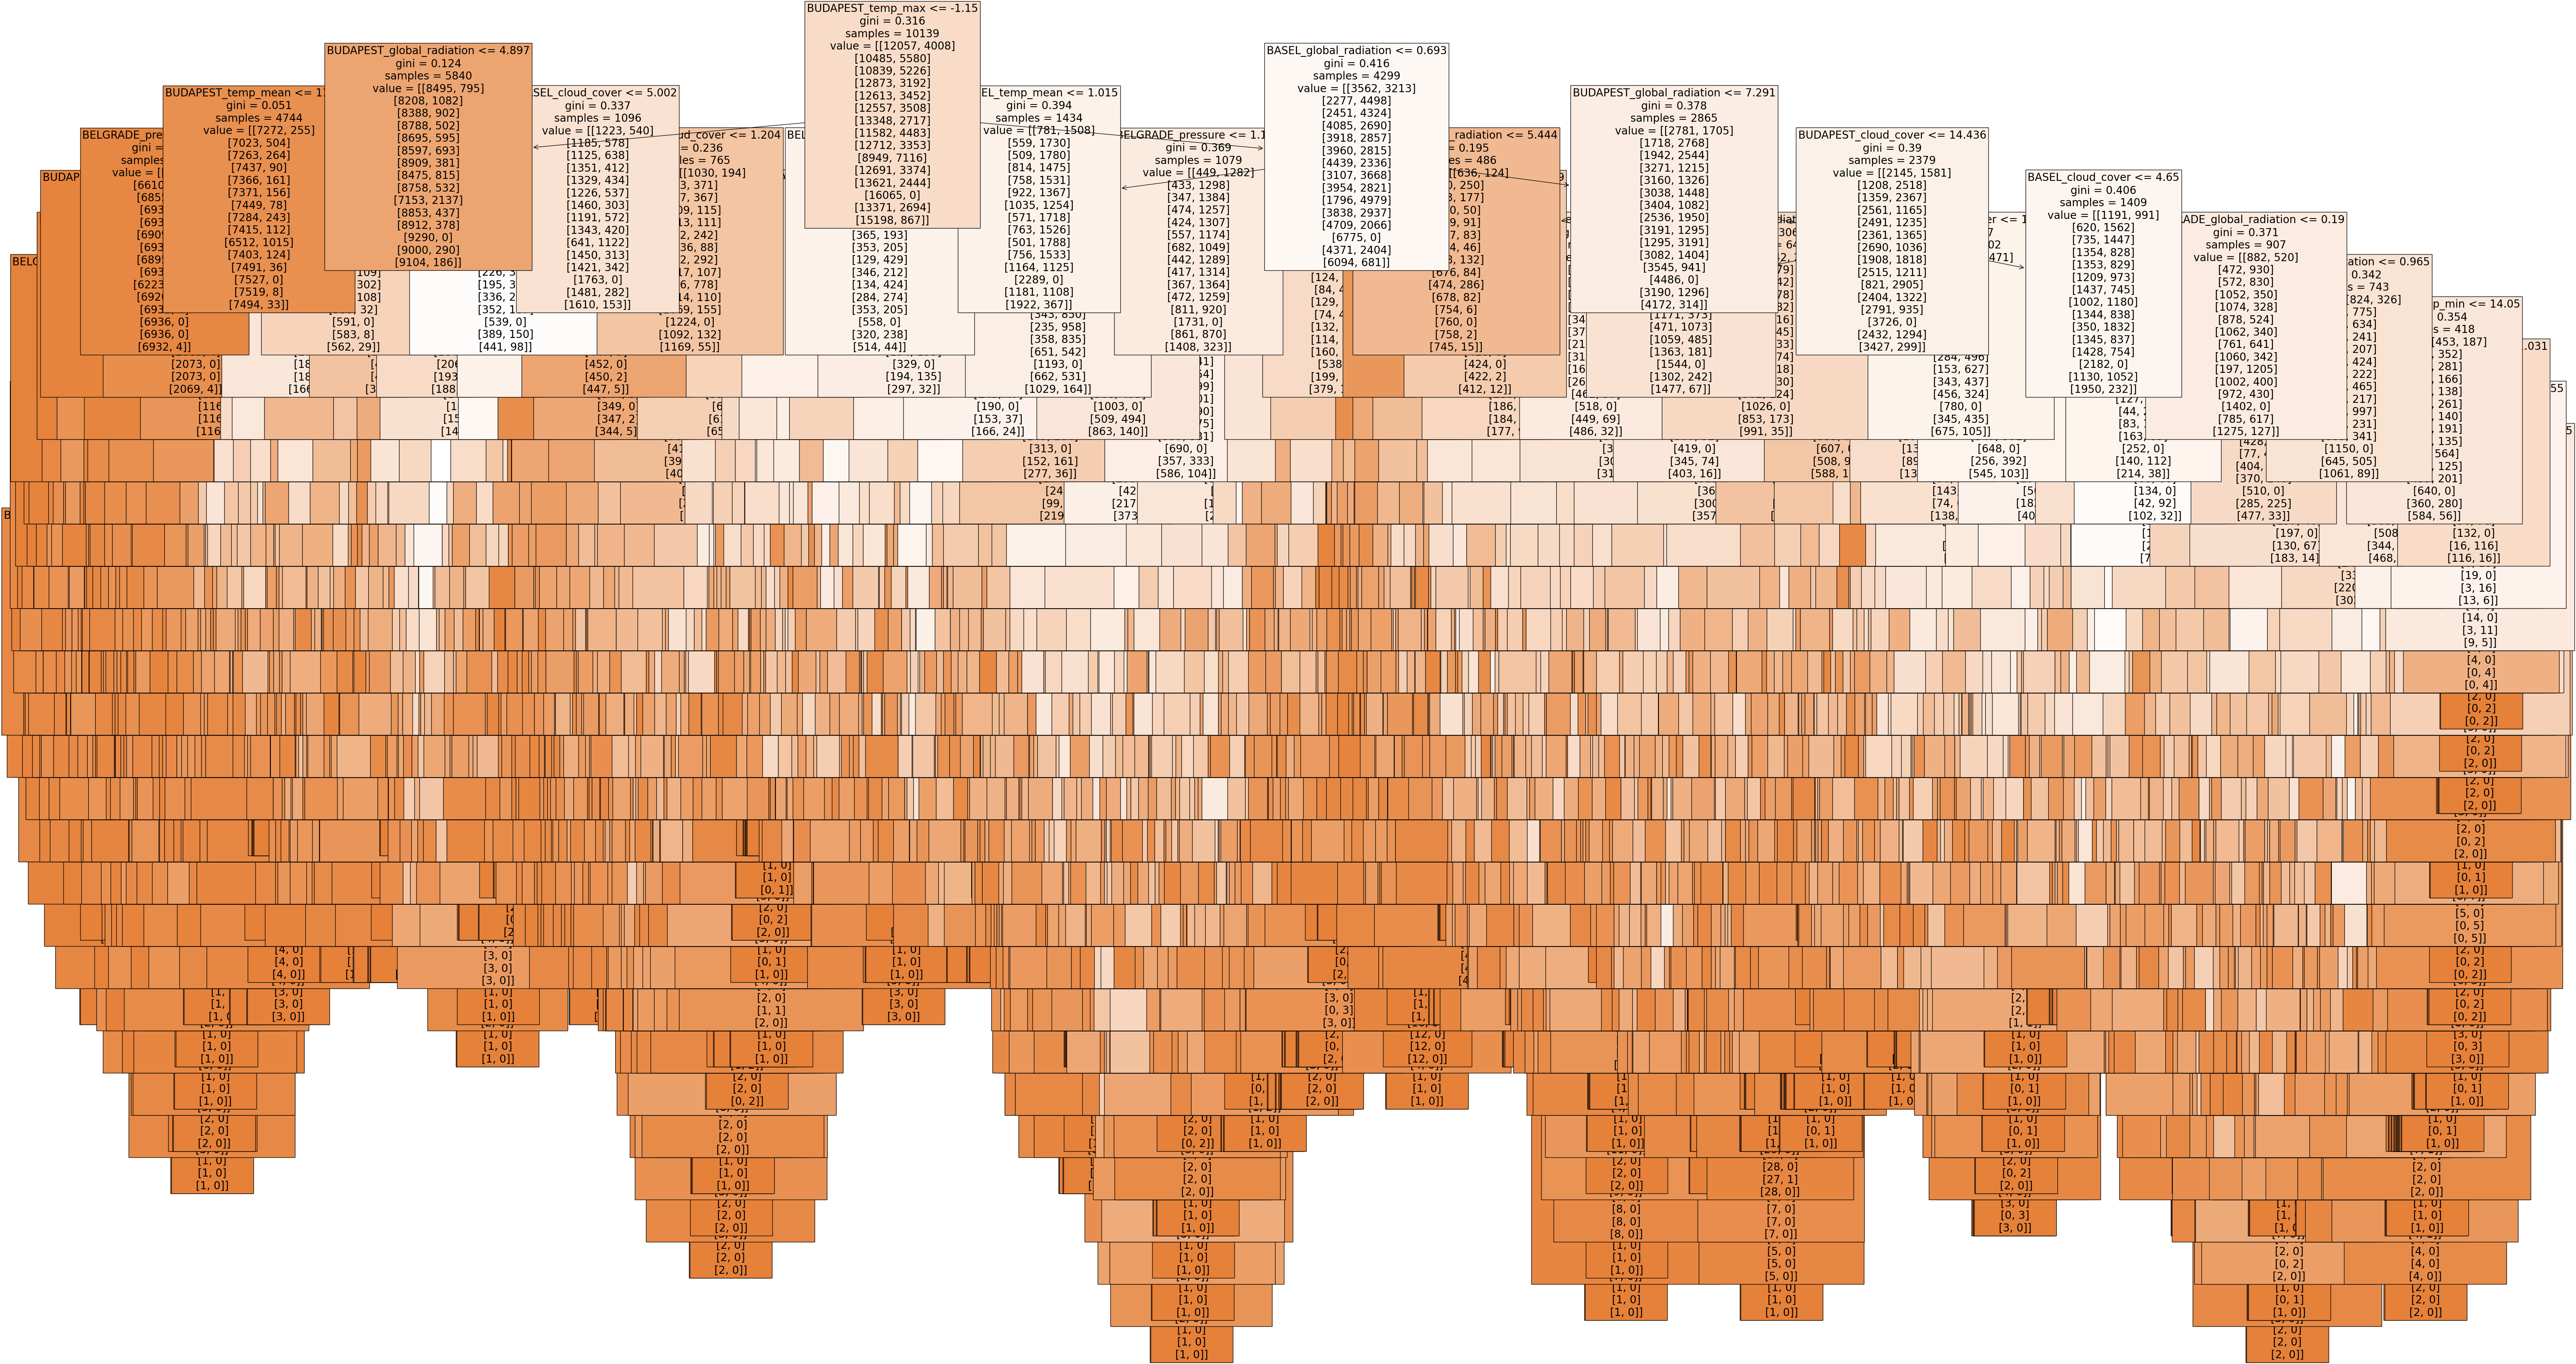

In [9]:
fig = plt.figure(figsize=(80, 40))
plot_tree(
    clf.estimators_[15],
    fontsize=20,
    class_names=["Pleasant", "Unpleasant"],  
    feature_names=df_weather.columns,
    filled=True
)

                 Feature  Importance
24          avg_temp_max    0.125116
18         avg_temp_mean    0.075815
21          avg_temp_min    0.066737
19         max_temp_mean    0.055695
0        avg_cloud_cover    0.055141
25          max_temp_max    0.054732
15          avg_sunshine    0.051989
26          min_temp_max    0.042539
12     avg_precipitation    0.041639
9   avg_global_radiation    0.040870
6           avg_pressure    0.034961
7           max_pressure    0.032207
22          max_temp_min    0.031729
20         min_temp_mean    0.031591
3           avg_humidity    0.030959
16          max_sunshine    0.030707
23          min_temp_min    0.028679
8           min_pressure    0.027819
10  max_global_radiation    0.025835
13     max_precipitation    0.025545
11  min_global_radiation    0.024442
5           min_humidity    0.020213
4           max_humidity    0.019933
17          min_sunshine    0.011226
2        min_cloud_cover    0.008421
1        max_cloud_cover    0.005294
1

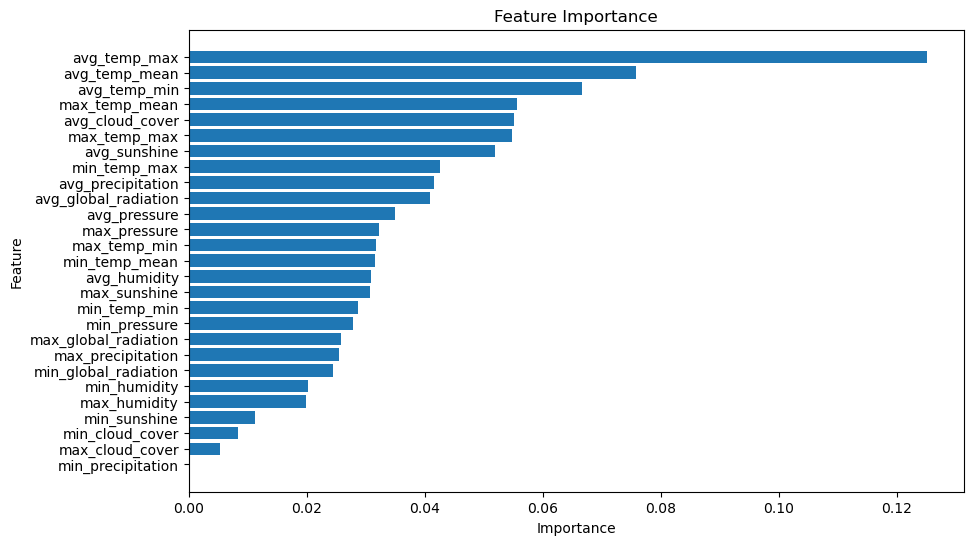

In [10]:
# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [11]:
aggregated_df.to_csv(os.path.join(path, 'DATASET_aggregated_1-14.csv'), index=False)